# Lung Cancer Prediction

In [3]:
import jovian

In [7]:
jovian.commit(filename='Lung-Cancer-Prediction.ipynb')

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY:

  ·································································································································································································································································································································


[jovian] Updating notebook "bharathkalyans/lung-cancer-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/bharathkalyans/lung-cancer-prediction


'https://jovian.ai/bharathkalyans/lung-cancer-prediction'

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Reading data from CSV and Loading into Data Frame

In [4]:
# Loading CSV files to our dataframe!
dataframe = pd.read_csv('lung.csv')

In [7]:
dataframe.head()
# 1 represent's NO &  2 represent's YES

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [9]:
dataframe.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
2995,F,71,2,1,1,2,2,1,1,1,1,2,1,1,2,NO
2996,F,75,1,2,1,1,1,2,2,2,2,1,1,2,1,NO
2997,F,62,2,2,2,1,2,2,2,2,1,1,2,2,2,YES
2998,M,30,1,1,2,2,2,2,2,2,2,1,2,1,2,YES
2999,M,40,1,2,2,1,1,1,2,2,2,1,1,1,1,YES


## PreProcessing and Cleaning Data

In [12]:
# List all attributes (columns)
columns = dataframe.columns
columns = columns.tolist() # Getting list of attributes
print(columns)

['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER']


#### Dealing with null,duplicate and String values

In [15]:
dataframe.isnull().sum()
# No null values present in the Data Set!

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [17]:
# Below Code displays the Number of Duplicate Values and Removes them!
duplicate_values = dataframe.duplicated()
print('Number of Duplicate Values in the Data Set :: ',duplicate_values.sum())
dataframe[duplicate_values]

Number of Duplicate Values in the Data Set ::  2


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
1476,M,53,1,2,2,2,2,1,1,1,1,2,2,1,2,NO
2039,M,50,1,1,1,2,1,2,1,2,2,2,2,1,2,YES


In [19]:
dataframe.drop_duplicates(inplace=True)
duplicates = dataframe.duplicated()
print(duplicates)
print(duplicates.sum())
print(dataframe.shape)

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 2998, dtype: bool
0
(2998, 16)


In [21]:
dataframe.dtypes
# No string values and boolean values!(Boolean values automatially get converted to numeric 0's and 1's)

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC_DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL_CONSUMING         int64
COUGHING                  int64
SHORTNESS_OF_BREATH       int64
SWALLOWING_DIFFICULTY     int64
CHEST_PAIN                int64
LUNG_CANCER              object
dtype: object

In [23]:
# Replacing values 0 now signifies NO and 1 signifies 'YES'!
dataframe = dataframe.replace(1,0)    
dataframe.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,0,0,0,2,2,0,2,2,2,2,2,2,0,NO
1,F,55,0,2,2,0,0,2,2,2,0,0,0,2,2,NO
2,F,78,2,2,0,0,0,2,0,2,0,0,2,0,0,YES
3,M,60,2,0,0,0,2,0,2,0,0,2,0,2,2,YES
4,F,80,0,0,2,0,0,2,0,2,0,0,0,0,2,NO


In [25]:
dataframe = dataframe.replace(2,1)   
dataframe.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,0,0,0,1,1,0,1,1,1,1,1,1,0,NO
1,F,55,0,1,1,0,0,1,1,1,0,0,0,1,1,NO
2,F,78,1,1,0,0,0,1,0,1,0,0,1,0,0,YES
3,M,60,1,0,0,0,1,0,1,0,0,1,0,1,1,YES
4,F,80,0,0,1,0,0,1,0,1,0,0,0,0,1,NO


In [27]:
dataframe['LUNG_CANCER'] = dataframe['LUNG_CANCER'].replace('YES',1)
dataframe['LUNG_CANCER'] = dataframe['LUNG_CANCER'].replace('NO',0)
dataframe.head()

C:\Users\shazd\AppData\Local\Temp\ipykernel_5320\1288771626.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe['LUNG_CANCER'] = dataframe['LUNG_CANCER'].replace('NO',0)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,0,0,0,1,1,0,1,1,1,1,1,1,0,0
1,F,55,0,1,1,0,0,1,1,1,0,0,0,1,1,0
2,F,78,1,1,0,0,0,1,0,1,0,0,1,0,0,1
3,M,60,1,0,0,0,1,0,1,0,0,1,0,1,1,1
4,F,80,0,0,1,0,0,1,0,1,0,0,0,0,1,0


In [29]:
dataframe["GENDER"] = dataframe["GENDER"].replace('M',1)
dataframe["GENDER"] = dataframe["GENDER"].replace('F',0)

C:\Users\shazd\AppData\Local\Temp\ipykernel_5320\766362658.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe["GENDER"] = dataframe["GENDER"].replace('F',0)


In [31]:
dataframe.shape
# 16 --> Attributes
# 309 --> Instances

(2998, 16)

In [33]:
dataframe

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,65,0,0,0,1,1,0,1,1,1,1,1,1,0,0
1,0,55,0,1,1,0,0,1,1,1,0,0,0,1,1,0
2,0,78,1,1,0,0,0,1,0,1,0,0,1,0,0,1
3,1,60,1,0,0,0,1,0,1,0,0,1,0,1,1,1
4,0,80,0,0,1,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,71,1,0,0,1,1,0,0,0,0,1,0,0,1,0
2996,0,75,0,1,0,0,0,1,1,1,1,0,0,1,0,0
2997,0,62,1,1,1,0,1,1,1,1,0,0,1,1,1,1
2998,1,30,0,0,1,1,1,1,1,1,1,0,1,0,1,1


#### Description of the Data Set

In [36]:
dataframe.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000
mean,0.504336,55.171448,0.491328,0.514009,0.493996,0.498666,0.509673,0.489660,0.507005,0.497332,0.491328,0.510340,0.487658,0.489993,0.498332,0.506004
std,0.500065,14.728302,0.500008,0.499887,0.500047,0.500082,0.499990,0.499976,0.500034,0.500076,0.500008,0.499976,0.499931,0.499983,0.500081,0.500047
min,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,55.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,68.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
print(dataframe.nunique())
# Unique Values in each column!

GENDER                    2
AGE                      51
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC_DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL_CONSUMING         2
COUGHING                  2
SHORTNESS_OF_BREATH       2
SWALLOWING_DIFFICULTY     2
CHEST_PAIN                2
LUNG_CANCER               2
dtype: int64


## Data Visualization

In [41]:
sb.set_style("whitegrid")

<Axes: title={'center': 'No. of Lung Cancer Diagnosed People'}, xlabel='LUNG_CANCER', ylabel='count'>

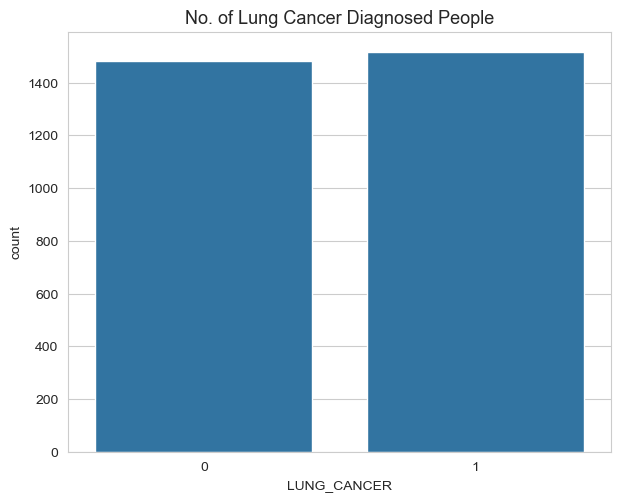

In [43]:
plt.figure(figsize=(7,12))
plt.subplot(2,1,1)
plt.title('No. of Lung Cancer Diagnosed People',fontsize=13)
sb.countplot(x='LUNG_CANCER',data = dataframe)
# Below graph shows the no.of people suffering with Lung Cancer!

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

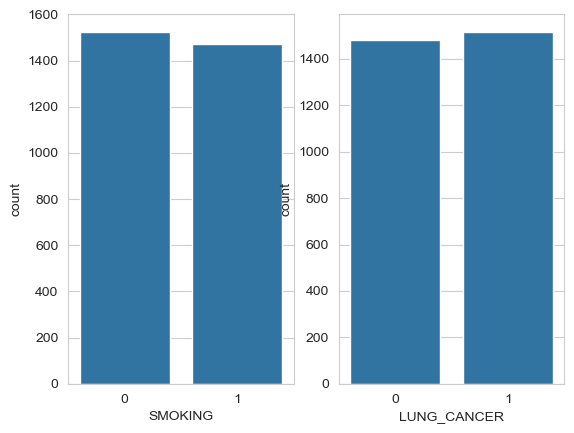

In [45]:
plt.subplot(1,2,1)
sb.countplot(x='SMOKING',data = dataframe)

plt.subplot(1,2,2)
sb.countplot(x='LUNG_CANCER',data = dataframe)


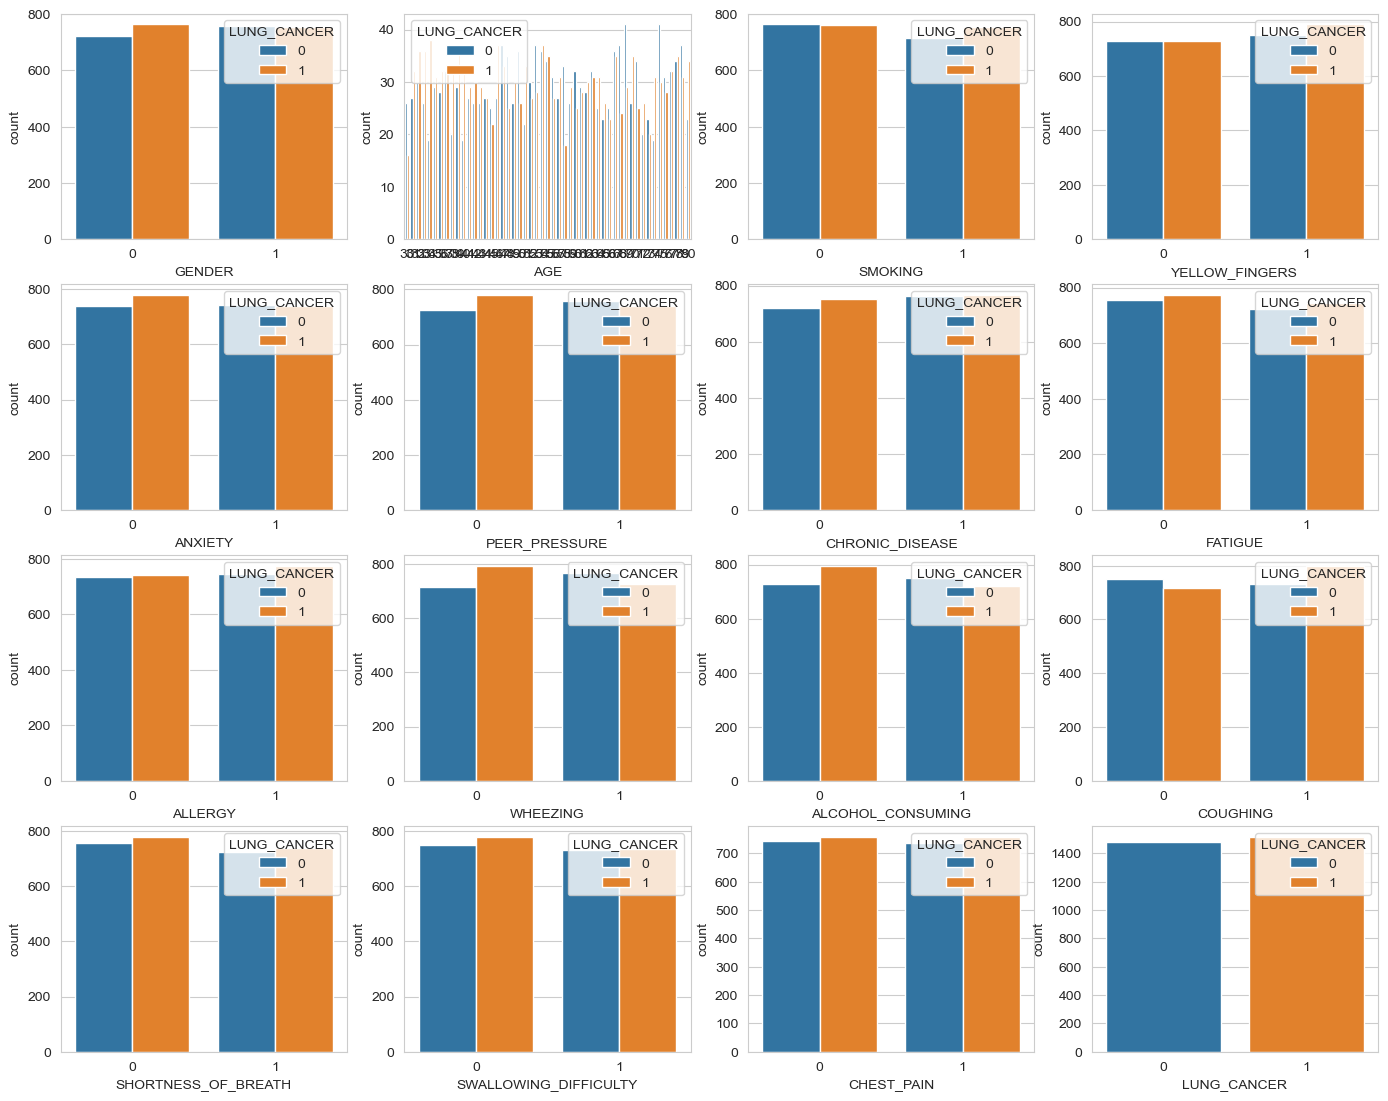

In [48]:
plt.figure(figsize=(17,17))
for i in enumerate(columns):
    plt.subplot(5,4,i[0]+1)
    sb.countplot(x=i[1], hue='LUNG_CANCER' ,data = dataframe)
    

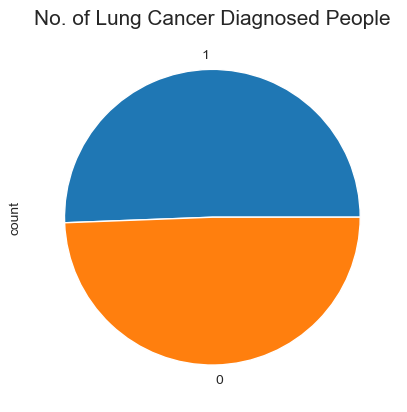

In [49]:
# Pie chart
plt.title('No. of Lung Cancer Diagnosed People',fontsize=15)
dataframe['LUNG_CANCER'].value_counts().plot.pie()
plt.show()

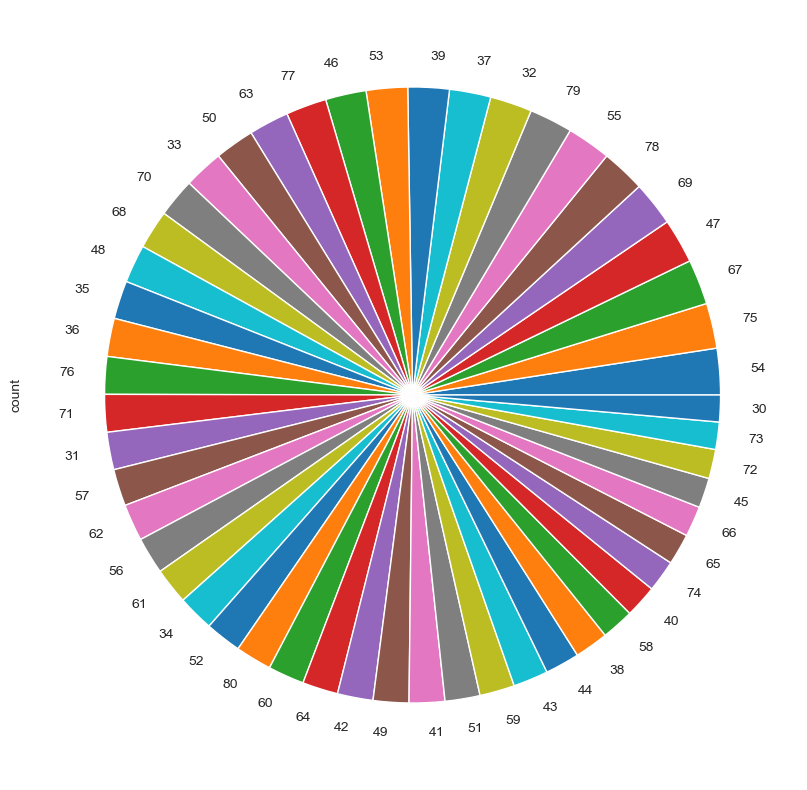

In [50]:
# Pie Chart of all Age Groups!

plt.figure(figsize=(10,10))
dataframe['AGE'].value_counts().plot.pie()
plt.show()

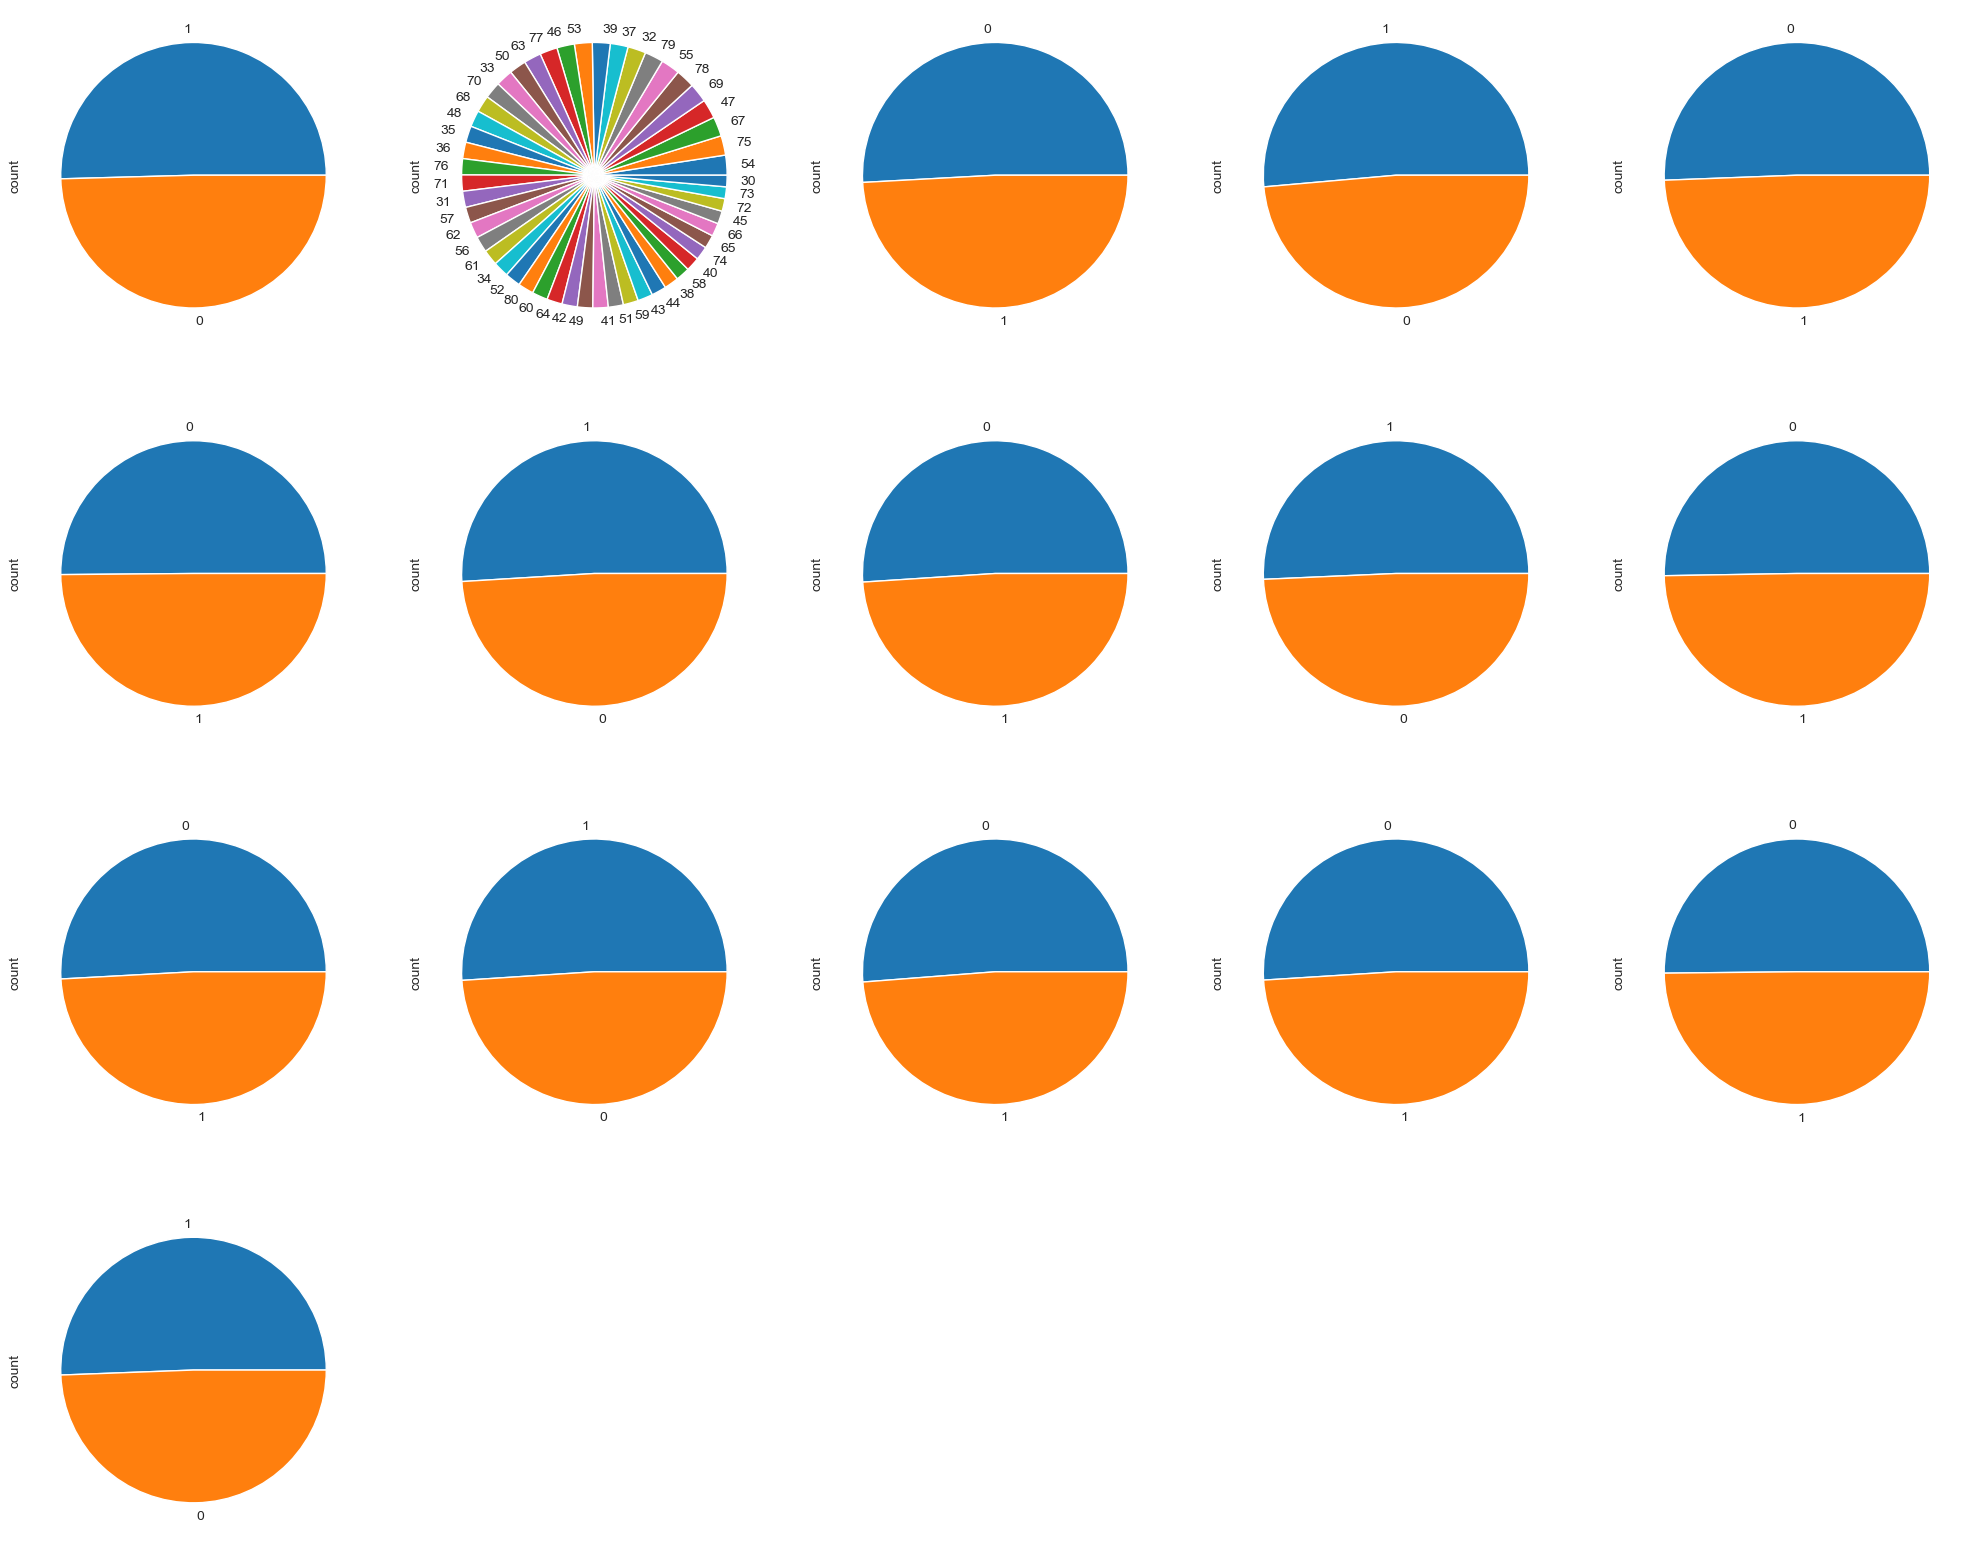

In [51]:
# Creating Sub Plots of all attributes! for better Visualization!
plt.figure(figsize=(25,25))
for i in range(0,len(columns)):
    plt.subplot(5,5,i+1)
    dataframe[columns[i]].value_counts().plot.pie()
    


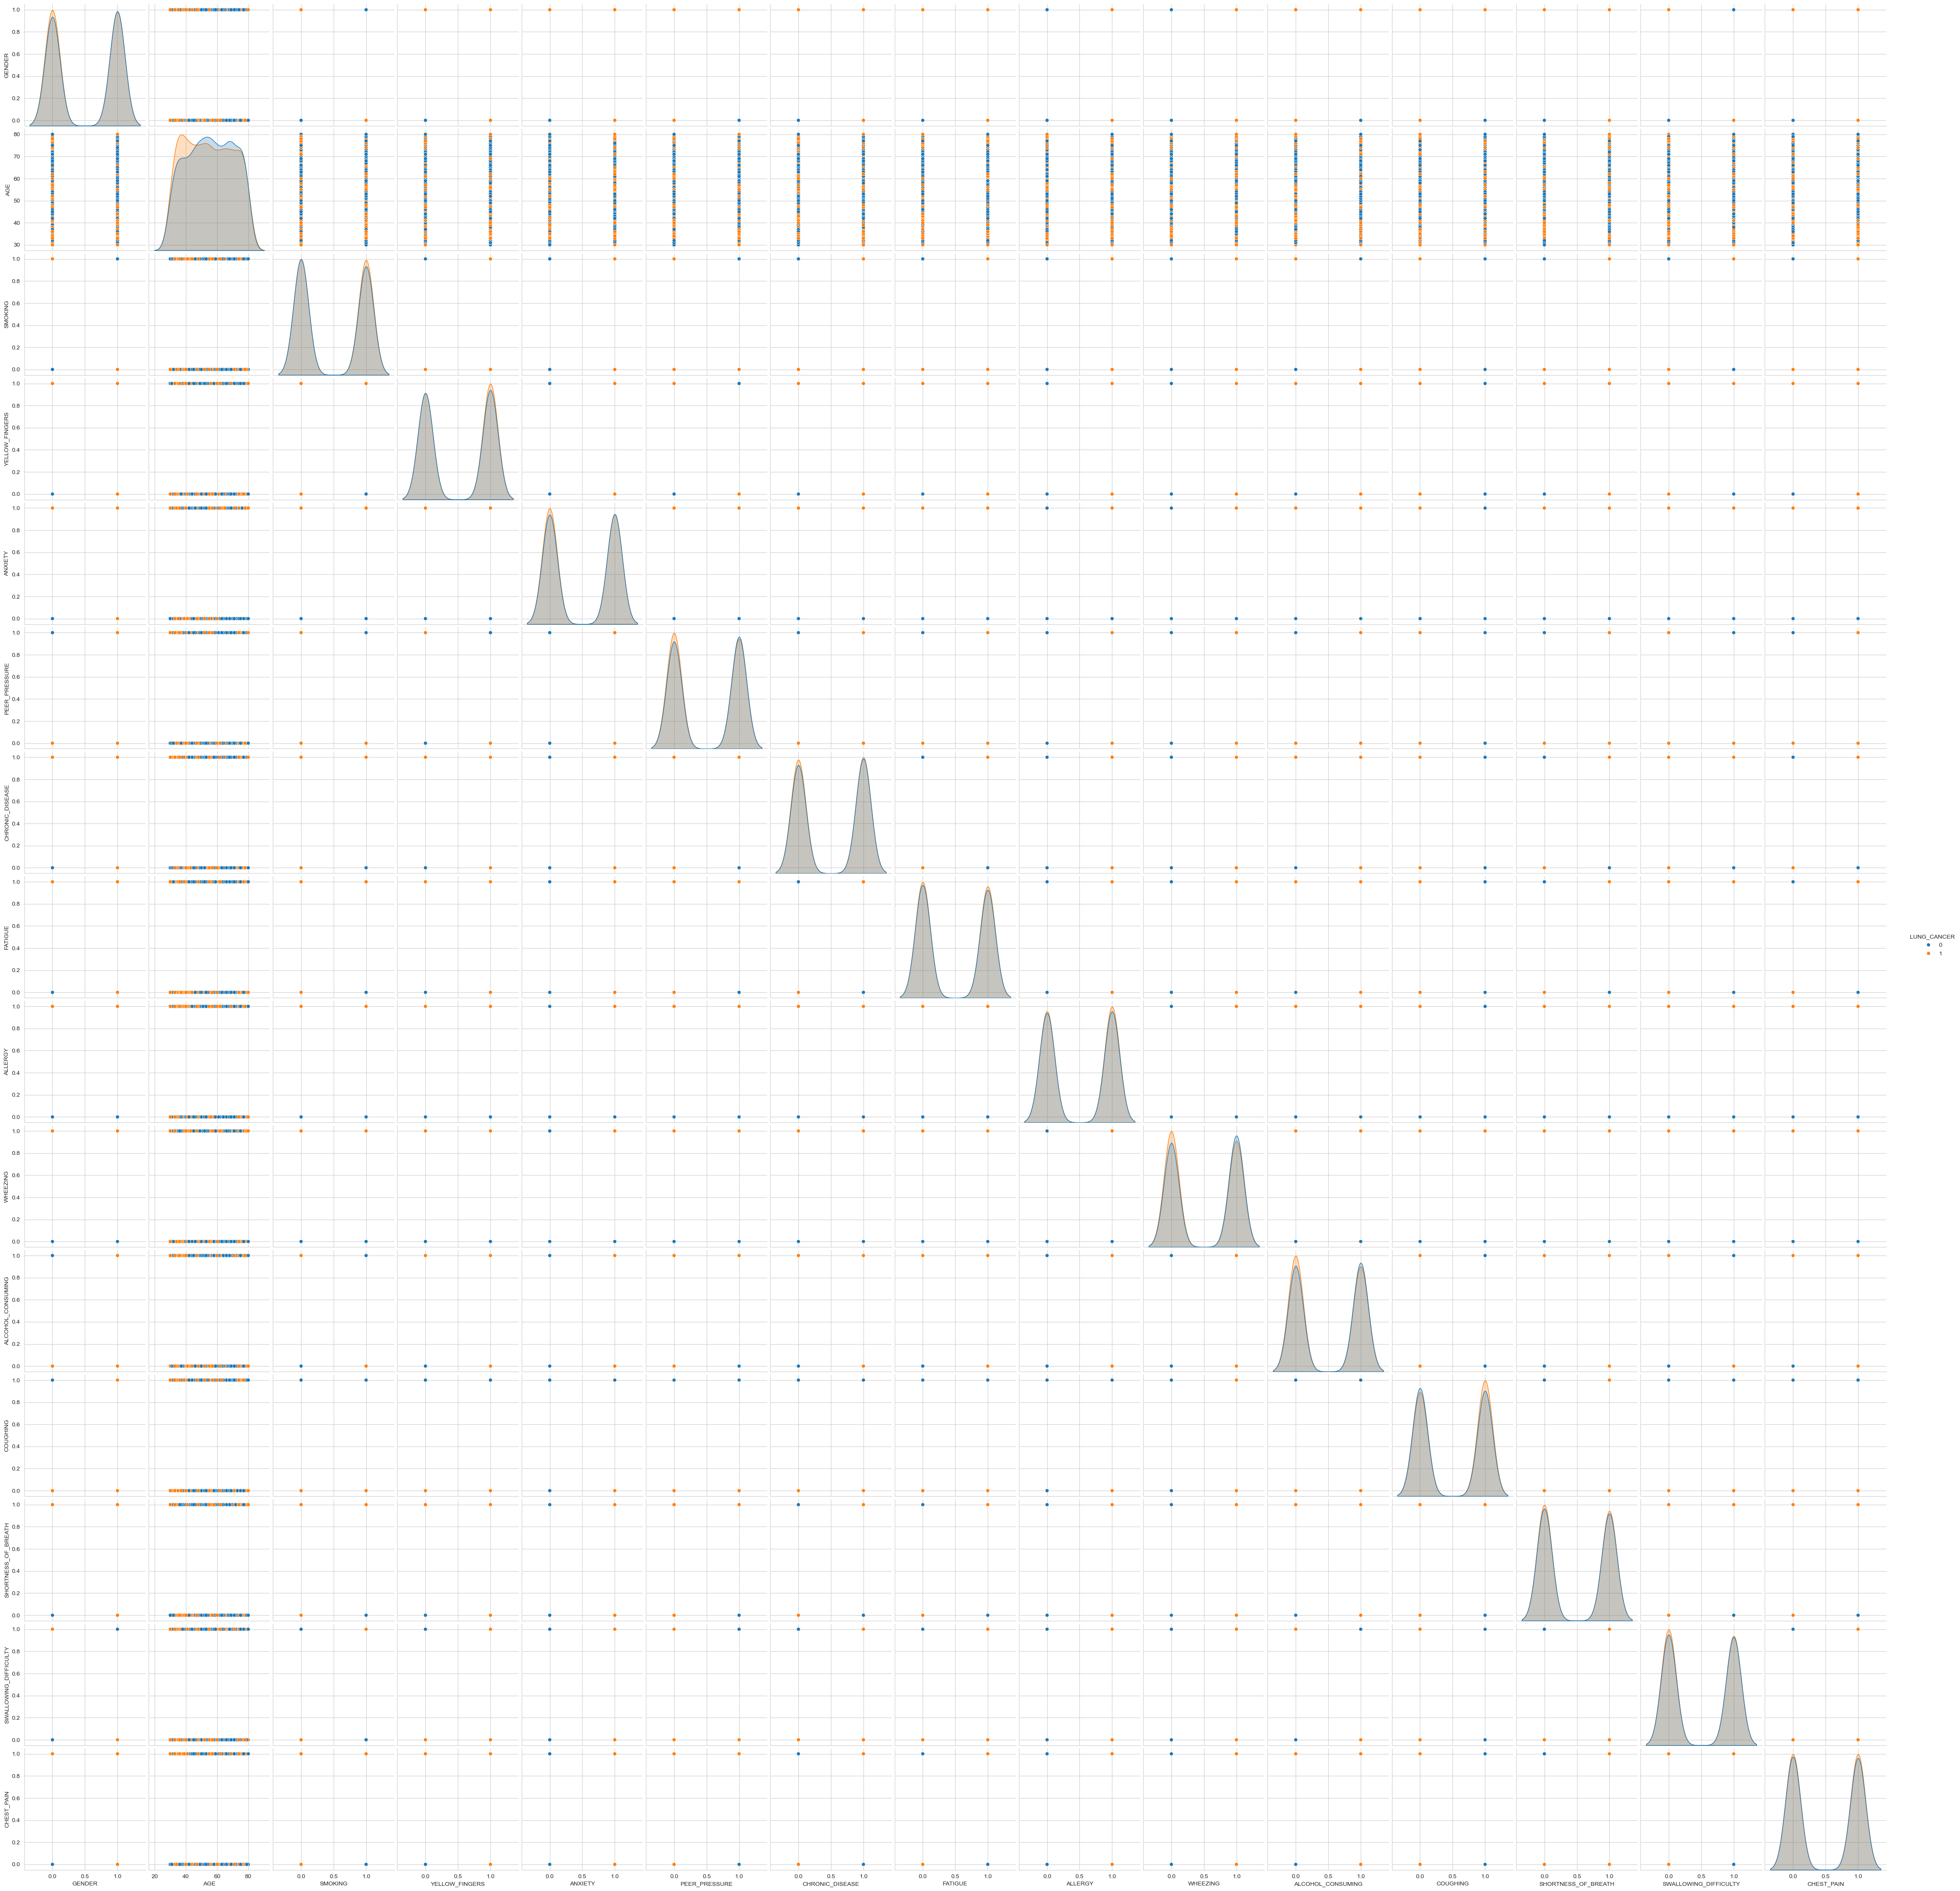

In [52]:
sb.pairplot(dataframe,height=3,hue='LUNG_CANCER')

### Corelation between Variables

In [58]:
corelation = dataframe.corr()
corelation

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
GENDER,1.000000,0.011134,-0.027873,0.014440,-0.023914,0.009363,0.008507,0.002181,0.013890,-0.009294,-0.009191,-0.006185,0.011559,-0.015841,-0.001972,-0.016117
AGE,0.011134,1.000000,-0.020459,0.016034,0.029996,0.004018,-0.025735,-0.002251,0.024755,-0.018150,-0.020640,-0.024754,-0.015709,-0.001851,-0.005262,-0.035659
SMOKING,-0.027873,-0.020459,1.000000,-0.001516,-0.055591,-0.031405,0.045715,0.019662,0.004247,0.000575,0.003036,0.012371,-0.015111,-0.002349,-0.030750,0.014221
YELLOW_FINGERS,0.014440,0.016034,-0.001516,1.000000,0.011683,0.011420,-0.013892,-0.010100,-0.005732,0.004821,0.027853,0.010100,-0.034022,0.018584,-0.006580,0.013679
ANXIETY,-0.023914,0.029996,-0.055591,0.011683,1.000000,-0.024717,0.016247,-0.005587,-0.001166,-0.015409,-0.000876,-0.017101,-0.034999,0.033792,0.015972,-0.013867
PEER_PRESSURE,0.009363,0.004018,-0.031405,0.011420,-0.024717,1.000000,-0.021300,-0.017404,0.012047,-0.011355,0.013965,-0.013290,-0.029428,0.016628,-0.040036,-0.024653
CHRONIC_DISEASE,0.008507,-0.025735,0.045715,-0.013892,0.016247,-0.021300,1.000000,0.011746,-0.019623,0.022790,-0.027692,-0.003737,-0.020213,0.016404,-0.013947,-0.009574
FATIGUE,0.002181,-0.002251,0.019662,-0.010100,-0.005587,-0.017404,0.011746,1.000000,0.004961,0.014569,-0.000359,-0.001574,0.029525,0.010264,0.024620,0.001583
ALLERGY,0.013890,0.024755,0.004247,-0.005732,-0.001166,0.012047,-0.019623,0.004961,1.000000,0.005412,-0.011768,-0.045000,-0.041699,0.012292,0.019395,0.006504
WHEEZING,-0.009294,-0.018150,0.000575,0.004821,-0.015409,-0.011355,0.022790,0.014569,0.005412,1.000000,-0.004763,0.016125,-0.012144,-0.023461,-0.016029,-0.039299


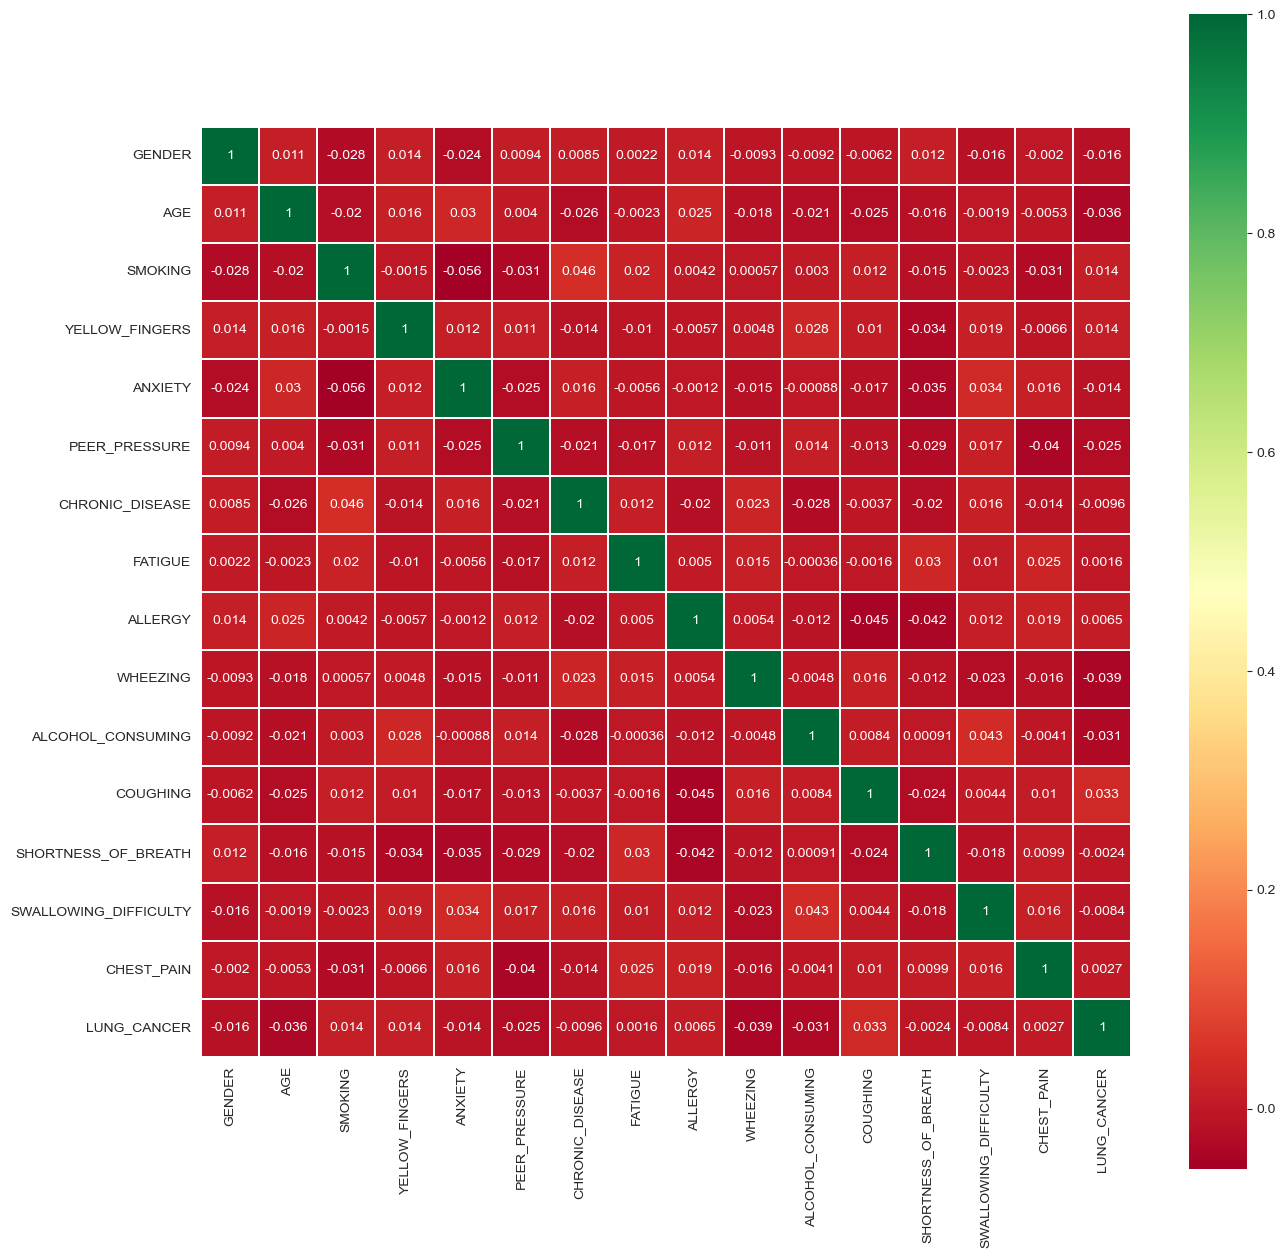

In [59]:
fig, ax = plt.subplots(figsize=(15, 15))
sb.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,square=True,linewidth=0.1,annot=True,cmap='RdYlGn')
plt.show()

We can see a strong co relation between Anxiety and Yellow Fingers and Swallowing Difficulty! Seaborn comes in our help making things easier 
by visually displaying the Corelation!

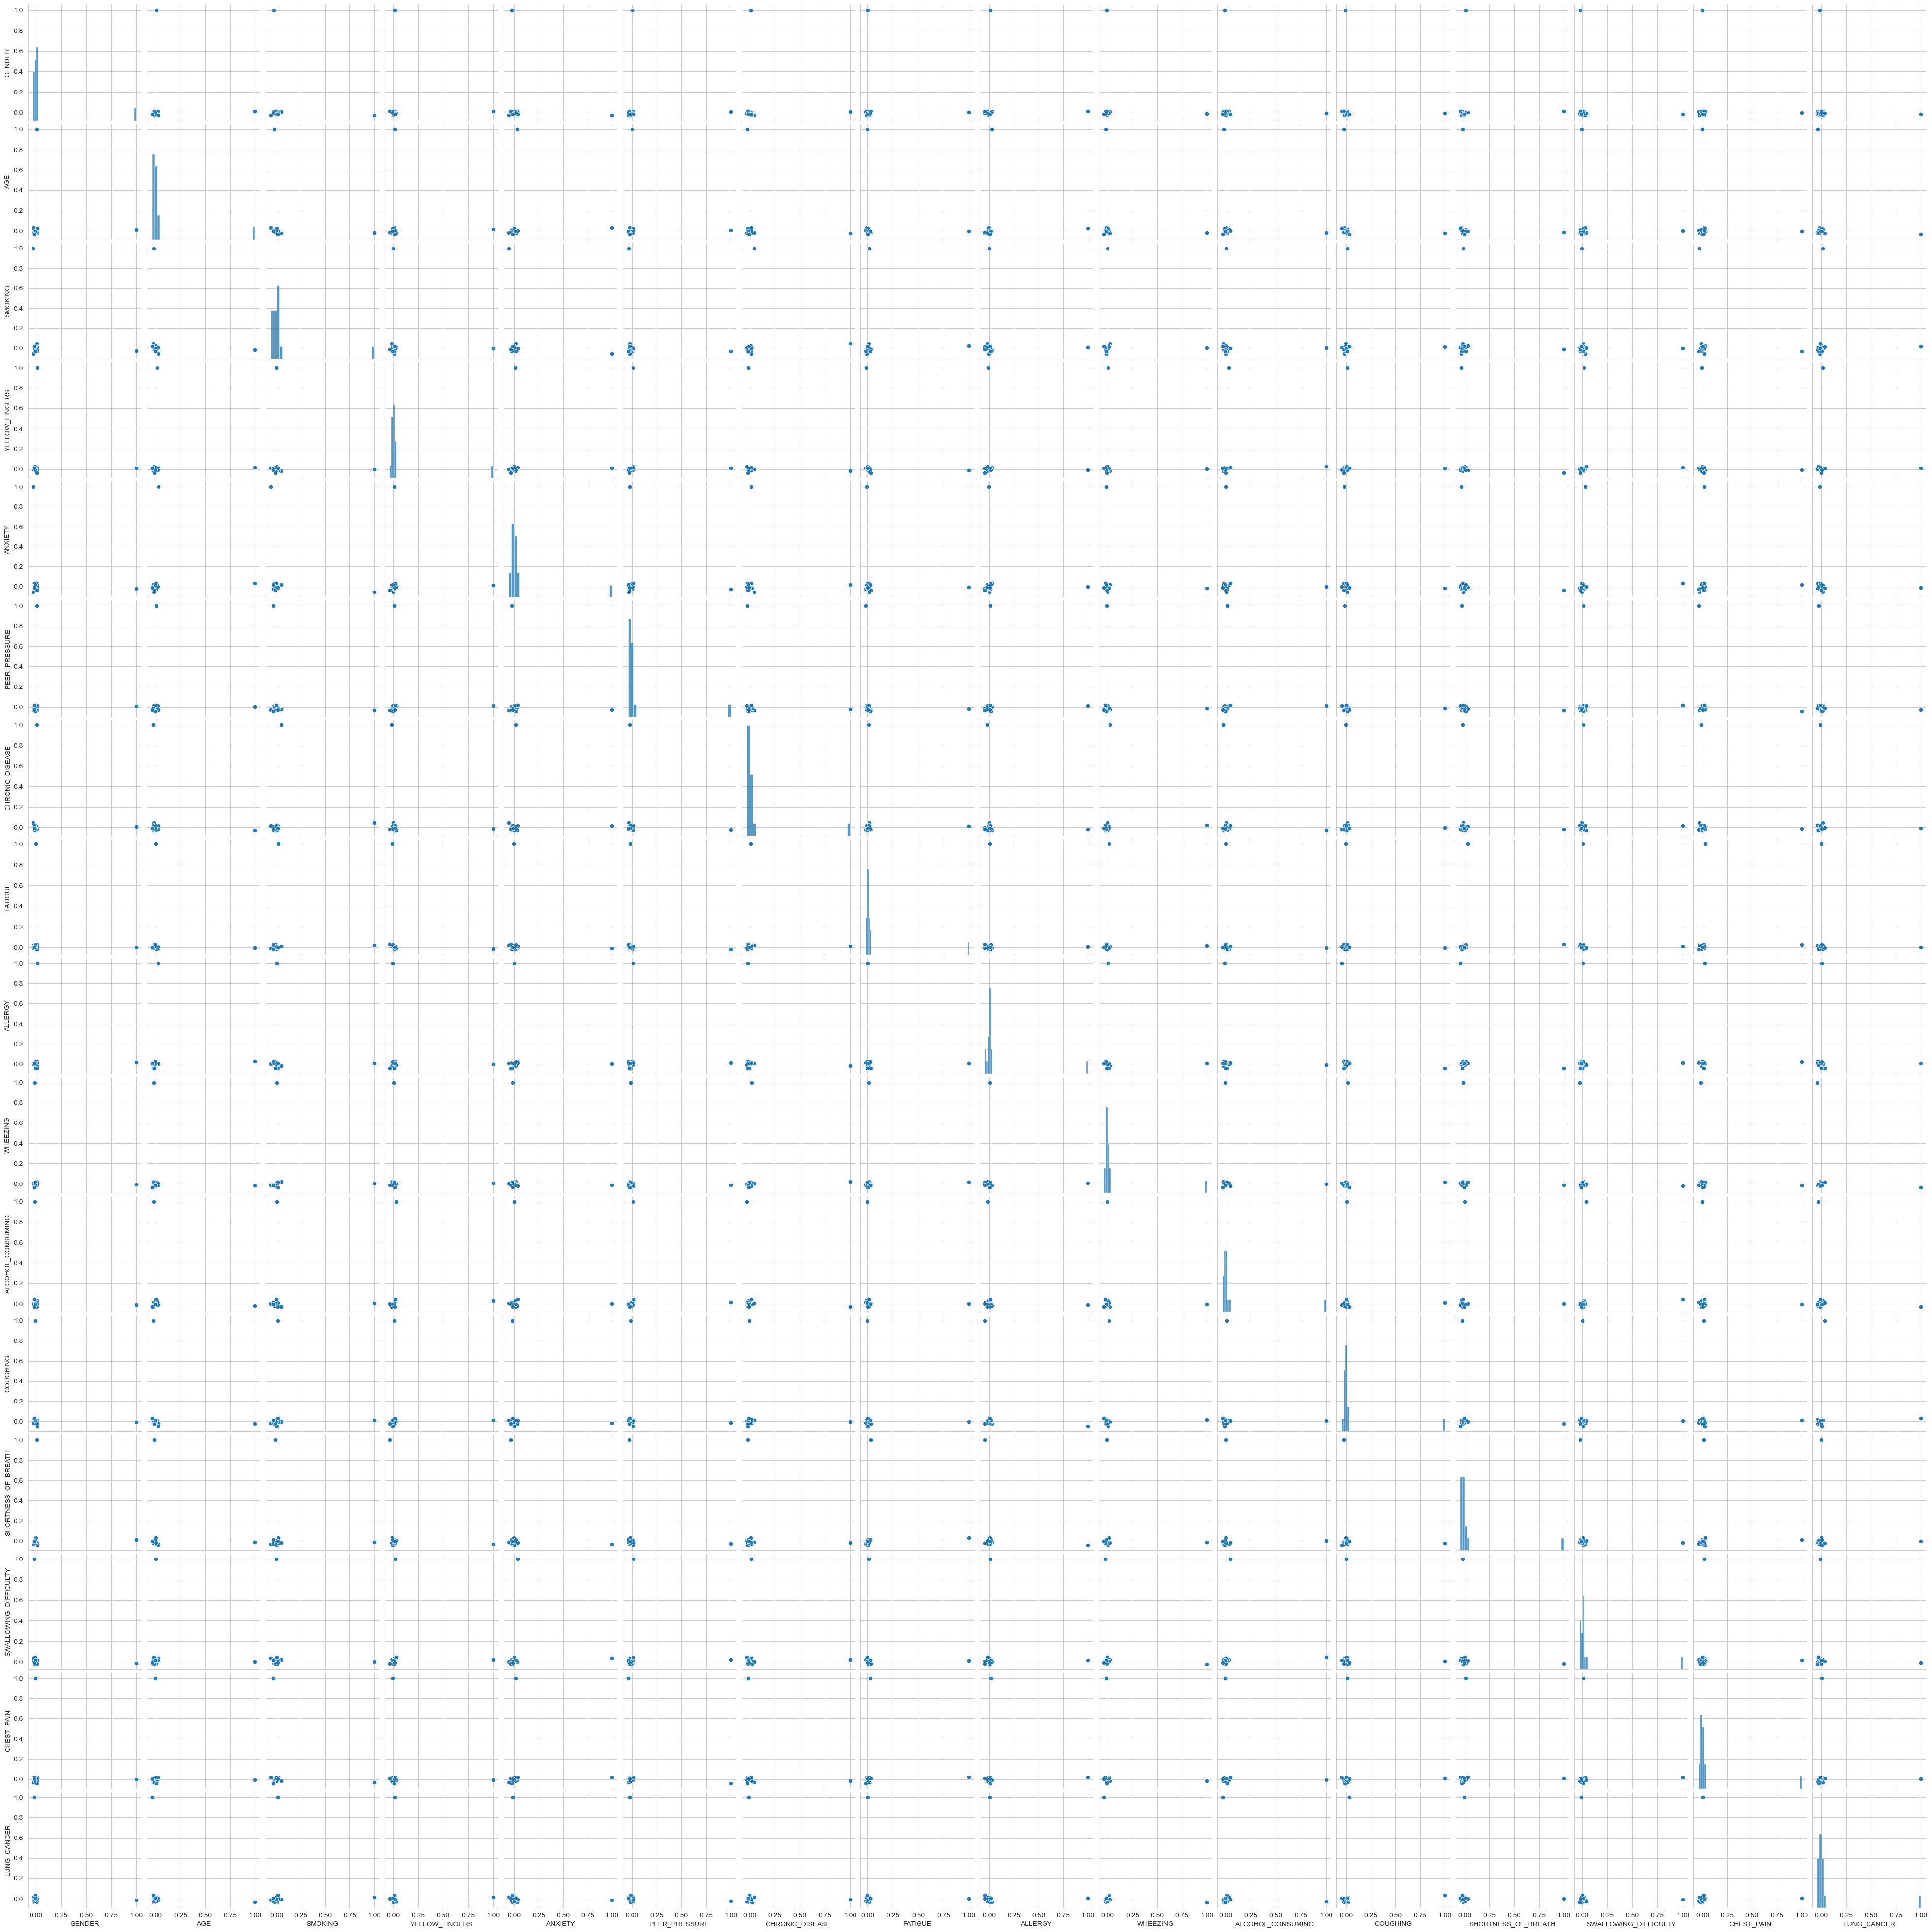

In [64]:
sb.pairplot(corelation)

## Splitting Data Set

In [67]:
from sklearn.model_selection import train_test_split 

In [69]:
dataframe

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,65,0,0,0,1,1,0,1,1,1,1,1,1,0,0
1,0,55,0,1,1,0,0,1,1,1,0,0,0,1,1,0
2,0,78,1,1,0,0,0,1,0,1,0,0,1,0,0,1
3,1,60,1,0,0,0,1,0,1,0,0,1,0,1,1,1
4,0,80,0,0,1,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,71,1,0,0,1,1,0,0,0,0,1,0,0,1,0
2996,0,75,0,1,0,0,0,1,1,1,1,0,0,1,0,0
2997,0,62,1,1,1,0,1,1,1,1,0,0,1,1,1,1
2998,1,30,0,0,1,1,1,1,1,1,1,0,1,0,1,1


### Supervised Learning

Our target is 'Lung Cancer' Attribute! Dividing the dataset and splitting them!
We will be using Classifier Algorithms because in Supervised Learning and that too in predictions if our outcomes are supposed to be YES or NO, it is suggested to use Classifier algorithms.Regression Algoriths are used for continous change in values like prices,salary,etc.

Refer https://www.javatpoint.com/regression-vs-classification-in-machine-learning

In [73]:
x_dataframe = dataframe.drop('LUNG_CANCER',axis=1)
x_dataframe

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
0,1,65,0,0,0,1,1,0,1,1,1,1,1,1,0
1,0,55,0,1,1,0,0,1,1,1,0,0,0,1,1
2,0,78,1,1,0,0,0,1,0,1,0,0,1,0,0
3,1,60,1,0,0,0,1,0,1,0,0,1,0,1,1
4,0,80,0,0,1,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,71,1,0,0,1,1,0,0,0,0,1,0,0,1
2996,0,75,0,1,0,0,0,1,1,1,1,0,0,1,0
2997,0,62,1,1,1,0,1,1,1,1,0,0,1,1,1
2998,1,30,0,0,1,1,1,1,1,1,1,0,1,0,1


In [75]:
y_dataframe = dataframe['LUNG_CANCER']
y_dataframe

0       0
1       0
2       1
3       1
4       0
       ..
2995    0
2996    0
2997    1
2998    1
2999    1
Name: LUNG_CANCER, Length: 2998, dtype: int64

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x_dataframe,y_dataframe)

In [79]:
x_train

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
2339,1,60,1,1,1,1,1,0,0,0,0,0,0,1,1
2367,0,75,0,1,1,0,0,0,1,0,1,1,0,0,0
892,1,55,0,0,0,0,0,1,0,1,1,0,1,1,0
2636,1,77,0,0,1,0,0,1,1,1,0,0,0,0,1
1687,1,79,1,1,1,1,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,1,48,1,0,1,1,0,1,1,1,0,1,0,0,0
2687,1,65,0,1,1,0,0,0,0,1,1,1,0,1,0
317,1,46,0,0,1,1,1,1,0,0,1,0,0,0,0
988,1,47,0,0,0,0,1,1,0,1,0,0,0,1,1


In [81]:
y_train

2339    0
2367    1
892     0
2636    1
1687    1
       ..
2835    0
2687    0
317     0
988     1
2657    0
Name: LUNG_CANCER, Length: 2248, dtype: int64

# Selection of Model

## GaussianNB

In [85]:
# We will be using Naive Bayes and GaussainNB Classifier
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
model

GaussianNB()

In [87]:
y_model = model.predict(x_test)
y_model

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [89]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_model)  # Gives you the accuracy!
print('Accuracy Score using GaussianNB :: ',accuracy * 100,'%')

Accuracy Score using GaussianNB ::  49.733333333333334 %


In [91]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_model)
mat

array([[173, 194],
       [183, 200]])

Text(52.722222222222214, 0.5, 'True Value')

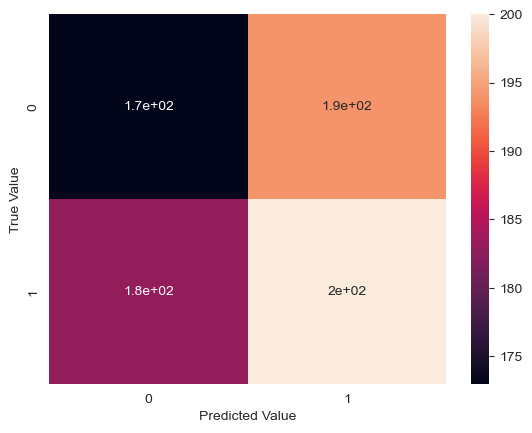

In [93]:
sb.heatmap(mat,annot = True,cbar = True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

The above confusion matrix shows that we have 2 + 3 = 5 false prediction and 4 + 60 = 64 correct predictions!

## BernoulliNB

In [97]:
# We will be using Naive Bayes and BernoulliNB Classifier
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train,y_train)
model

BernoulliNB()

In [99]:
y_model = model.predict(x_test)
y_model

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [101]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_model)  # Gives you the accuracy!
print('Accuracy Score using BernoulliNB :: ',accuracy * 100,'%')

Accuracy Score using BernoulliNB ::  50.53333333333333 %


In [103]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_model)
mat

array([[170, 197],
       [174, 209]])

Text(52.722222222222214, 0.5, 'True Value')

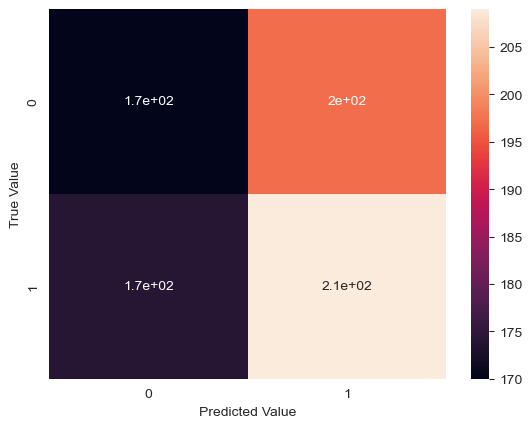

In [105]:
sb.heatmap(mat,annot = True,cbar = True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

The above confusion matrix shows that we have 2 + 2 = 4 false prediction and 5 + 60 = 65 correct predictions!

# Random Forest Classifier


In [109]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [111]:
RandomForestClassifierScore = rfc.score(x_test, y_test)
print("Accuracy of Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy of Random Forest Classifier model: 52.13333333333333


## Gradient Boost Classifier

In [115]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [117]:
GradientBoostingClassifierScore = gb.score(x_test,y_test)
print("Accuracy of Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

Accuracy of Gradient Boosting Classifier model: 53.06666666666666


In [119]:
# accuracy score on the training data
X_train_prediction = gb.predict(x_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [121]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.6481316725978647


In [123]:
# accuracy score on the test data
x_test_prediction = gb.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [125]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.5306666666666666


### Conclusion

##### We have used Supervised Learning Algorithm's Naive Bayes Classifier to get the accuracy of the trained model.
##### We have achieved over 90% accuracy using these algorithms

In [129]:
dataframe["GENDER"] = dataframe["GENDER"].replace(1,"MEN")
dataframe["GENDER"] = dataframe["GENDER"].replace(0,"WOMEN")
dataframe["LUNG_CANCER"] = dataframe["LUNG_CANCER"].replace(1,"HAS LUNG CANCER")
dataframe["LUNG_CANCER"] = dataframe["LUNG_CANCER"].replace(0,"DOESN'T HAVE LUNG CANCER")
dataframe = dataframe.replace(0,"NO")
dataframe = dataframe.replace(1,"YES")
dataframe

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,MEN,65,NO,NO,NO,YES,YES,NO,YES,YES,YES,YES,YES,YES,NO,DOESN'T HAVE LUNG CANCER
1,WOMEN,55,NO,YES,YES,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,DOESN'T HAVE LUNG CANCER
2,WOMEN,78,YES,YES,NO,NO,NO,YES,NO,YES,NO,NO,YES,NO,NO,HAS LUNG CANCER
3,MEN,60,YES,NO,NO,NO,YES,NO,YES,NO,NO,YES,NO,YES,YES,HAS LUNG CANCER
4,WOMEN,80,NO,NO,YES,NO,NO,YES,NO,YES,NO,NO,NO,NO,YES,DOESN'T HAVE LUNG CANCER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,WOMEN,71,YES,NO,NO,YES,YES,NO,NO,NO,NO,YES,NO,NO,YES,DOESN'T HAVE LUNG CANCER
2996,WOMEN,75,NO,YES,NO,NO,NO,YES,YES,YES,YES,NO,NO,YES,NO,DOESN'T HAVE LUNG CANCER
2997,WOMEN,62,YES,YES,YES,NO,YES,YES,YES,YES,NO,NO,YES,YES,YES,HAS LUNG CANCER
2998,MEN,30,NO,NO,YES,YES,YES,YES,YES,YES,YES,NO,YES,NO,YES,HAS LUNG CANCER


In [131]:
dataframe.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,MEN,65,NO,NO,NO,YES,YES,NO,YES,YES,YES,YES,YES,YES,NO,DOESN'T HAVE LUNG CANCER
1,WOMEN,55,NO,YES,YES,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,DOESN'T HAVE LUNG CANCER
2,WOMEN,78,YES,YES,NO,NO,NO,YES,NO,YES,NO,NO,YES,NO,NO,HAS LUNG CANCER
3,MEN,60,YES,NO,NO,NO,YES,NO,YES,NO,NO,YES,NO,YES,YES,HAS LUNG CANCER
4,WOMEN,80,NO,NO,YES,NO,NO,YES,NO,YES,NO,NO,NO,NO,YES,DOESN'T HAVE LUNG CANCER


# Making a Predictive System

In [134]:
input_data = (1, 65, 1, 1, 1,1, 1, 1, 1,1,1,1,1,1,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

feature_names=['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']

prediction = gb.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have lung cancer')
else:
  print('The person has lung cancer')

[0]
The person does not have lung cancer


C:\Users\shazd\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [171]:
jovian.commit(filename = 'Lung-Cancer-Prediction.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bharathkalyans/lung-cancer-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/bharathkalyans/lung-cancer-prediction


'https://jovian.ai/bharathkalyans/lung-cancer-prediction'

In [136]:
dataframe.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

In [138]:
import pickle

In [140]:
filename = 'lung_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [142]:
# loading the saved model
loaded_model = pickle.load(open('lung_disease_model.sav', 'rb'))

In [144]:
for column in x_dataframe.columns:
  print(column)

GENDER
AGE
SMOKING
YELLOW_FINGERS
ANXIETY
PEER_PRESSURE
CHRONIC_DISEASE
FATIGUE
ALLERGY
WHEEZING
ALCOHOL_CONSUMING
COUGHING
SHORTNESS_OF_BREATH
SWALLOWING_DIFFICULTY
CHEST_PAIN
